# Predicting Survivorship On The Titanic #

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid
import sklearn

import numpy as np


import warnings
warnings.filterwarnings("ignore")


### After importing the libraries and tools needed, it was now time to look over the training and test datasets ###

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [27]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


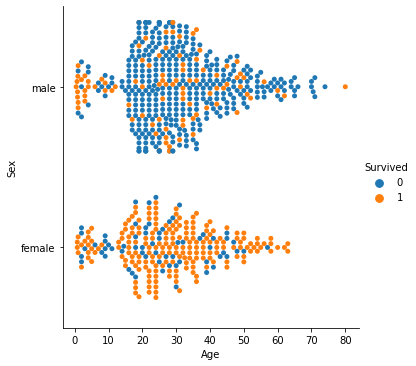

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
ax1=sns.catplot(data=df_train, kind="swarm", x="Age", y="Sex", hue="Survived")

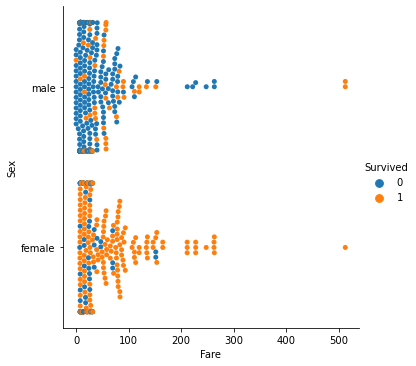

In [24]:
ax1=sns.catplot(data=df_train, kind="swarm", x="Fare", y="Sex", hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='Pclass'>

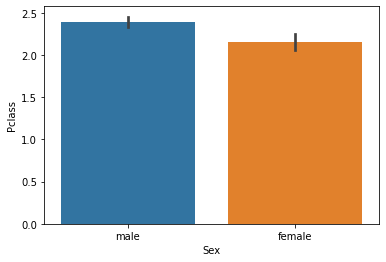

In [39]:
sns.barplot(data=df_train, x = "Sex", y = "Pclass")

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

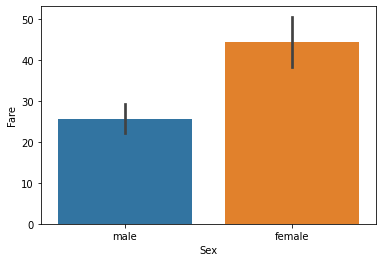

In [37]:
sns.barplot(data=df_train, x = "Sex", y = "Fare")

### From the diagrams and graphs from above, we can see that there were some correlations of features with survivorship and even among other features. We can see that gender had a major effect on if someone was to survive or not and so that became a very important feature






In [4]:
# Function to help us determine the accuracy of our model utilizing KFolds
def cv(model):
    from sklearn.model_selection import RepeatedKFold
    df = pd.read_csv("train.csv")
    df_test = pd.read_csv("test.csv")
    data = df.copy()
    array = []
    all_score = []

    random_state = 1
    rkf = RepeatedKFold(n_splits=2, n_repeats = 2, random_state=1)
    for train, test in rkf.split(data):
        array.append(train)
    for kfold in array:
        score = model(df.iloc[kfold])
        all_score.append(score)
    return np.mean(all_score)

In [5]:
# A MLP classifier that only uses the Pclass and Sex feature

new_df_train = df_train[["Pclass","Sex", "Survived", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
new_df_train["Age"] = new_df_train["Age"].fillna(np.mean(df_train["Age"]))
new_df_train["Age"] = np.log(new_df_train["Age"])
new_df_train = new_df_train.round()

clf = MLPClassifier(hidden_layer_sizes=(1000), max_iter=200,
                     solver='adam', verbose=1,  random_state=1)  #sgd = Stochastic Gradient descent. Also, check 'lbfgs’, ‘adam’}
                                                                #Default activation is 'relu'
                                                                #Default n_iter_no_change=10
x = new_df_train[["Pclass", "Sex"]]
y = new_df_train["Survived"].to_frame()

clf.fit(x ,y)
y_pred_train = clf.predict(x)
print(accuracy_score(y,y_pred_train))


Iteration 1, loss = 0.66464027
Iteration 2, loss = 0.61281613
Iteration 3, loss = 0.58598972
Iteration 4, loss = 0.56166832
Iteration 5, loss = 0.54047680
Iteration 6, loss = 0.52113917
Iteration 7, loss = 0.50544867
Iteration 8, loss = 0.49321698
Iteration 9, loss = 0.48373942
Iteration 10, loss = 0.47665508
Iteration 11, loss = 0.47225463
Iteration 12, loss = 0.46863219
Iteration 13, loss = 0.46700044
Iteration 14, loss = 0.46577791
Iteration 15, loss = 0.46521338
Iteration 16, loss = 0.46522532
Iteration 17, loss = 0.46502704
Iteration 18, loss = 0.46431815
Iteration 19, loss = 0.46375206
Iteration 20, loss = 0.46438606
Iteration 21, loss = 0.46311974
Iteration 22, loss = 0.46295193
Iteration 23, loss = 0.46350447
Iteration 24, loss = 0.46413366
Iteration 25, loss = 0.46342448
Iteration 26, loss = 0.46256844
Iteration 27, loss = 0.46327919
Iteration 28, loss = 0.46210427
Iteration 29, loss = 0.46184112
Iteration 30, loss = 0.46172937
Iteration 31, loss = 0.46139775
Iteration 32, los

### We can see that we got a 78% accuracy using only two features. We can still add more features and do some feature engineering to continue increasing the accuracy

In [6]:
# MLP Model that utilizes all features
def model_1(df):
    df_train = df
    new_df_train = df_train[["Pclass","Sex", "Survived", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_train["Age"] = new_df_train["Age"].fillna(np.mean(df_train["Age"]))
    new_df_train["Embarked"] = new_df_train["Embarked"].fillna(np.mean(new_df_train["Embarked"]))
    new_df_train["Age"] = np.log(new_df_train["Age"])
    new_df_train["Relatives"] = new_df_train["Parch"] + new_df_train["SibSp"]
    new_df_train["Alone"] = new_df_train["Relatives"] < 1
    new_df_train = new_df_train.round()


    new_df_test = df_test[["Pclass","Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_test["Age"] = new_df_test["Age"].fillna(np.mean(df_test["Age"]))
    new_df_test["Age"] = np.log(new_df_test["Age"])
    new_df_test["Fare"] = new_df_test["Fare"].fillna(np.mean(df_test["Fare"]))
    new_df_test["Relatives"] = new_df_test["Parch"] + new_df_test["SibSp"]
    new_df_test["Alone"] = new_df_test["Relatives"] < 1
    new_df_test = new_df_test.round()


    clf = MLPClassifier(hidden_layer_sizes=(1000), max_iter=200,
                         solver='adam', verbose=1,  random_state=1)  #sgd = Stochastic Gradient descent. Also, check 'lbfgs’, ‘adam’}
                                                                    #Default activation is 'relu'
                                                                    #Default n_iter_no_change=10
    # x = new_df_train[["Pclass", "Sex","Fare","SibSp", "Parch", "Age"]]
    x = new_df_train[["Pclass", "Sex","Fare","SibSp", "Parch", "Age", "Relatives", "Embarked"]]
    xt = new_df_test[["Pclass", "Sex","Fare","SibSp", "Parch", "Age", "Relatives", "Embarked"]]
    y = new_df_train["Survived"].to_frame()

    clf.fit(x ,y)
    # y_pred_train = clf.predict(x)

    y_pred_test = clf.predict(xt)
    y_pred_train = clf.predict(x)
    print(accuracy_score(y,y_pred_train))
    submission = pd.DataFrame(index = df_test["PassengerId"])
    submission["Survived"] = y_pred_test
    submission.reset_index().to_csv("NN.csv", index = False)
    return accuracy_score(y,y_pred_train)
cv(model_1)

Iteration 1, loss = 0.76126340
Iteration 2, loss = 0.62595222
Iteration 3, loss = 0.61879836
Iteration 4, loss = 0.58857738
Iteration 5, loss = 0.57177101
Iteration 6, loss = 0.56557825
Iteration 7, loss = 0.55207455
Iteration 8, loss = 0.54729353
Iteration 9, loss = 0.53693019
Iteration 10, loss = 0.52135848
Iteration 11, loss = 0.50709359
Iteration 12, loss = 0.50868033
Iteration 13, loss = 0.49581198
Iteration 14, loss = 0.50242036
Iteration 15, loss = 0.48558400
Iteration 16, loss = 0.48252902
Iteration 17, loss = 0.47465256
Iteration 18, loss = 0.46288658
Iteration 19, loss = 0.46031081
Iteration 20, loss = 0.45184242
Iteration 21, loss = 0.44969713
Iteration 22, loss = 0.44206623
Iteration 23, loss = 0.43943405
Iteration 24, loss = 0.43670141
Iteration 25, loss = 0.43038683
Iteration 26, loss = 0.43403142
Iteration 27, loss = 0.44076627
Iteration 28, loss = 0.42570335
Iteration 29, loss = 0.44114068
Iteration 30, loss = 0.45201645
Iteration 31, loss = 0.42735768
Iteration 32, los

0.8187597621806822

### We can see that we have a 81% accuracy which is not too much better than 79% given that we are now using all features. This means that there is overfitting in our model and so we have to either drop a feature or figure another way. To see what happens if we have less features, we created the following model below

In [10]:
# MlP Classifier MODEL WITH LESS COLUMNS
def model_2(df):
    df_train = df
    new_df_train = df_train[["Pclass","Sex", "Survived", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_train["Age"] = new_df_train["Age"].fillna(np.mean(df_train["Age"]))
    new_df_train["Age"] = np.log(new_df_train["Age"])
    new_df_train = new_df_train.round()


    new_df_test = df_test[["Pclass","Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_test["Age"] = new_df_test["Age"].fillna(np.mean(df_test["Age"]))
    new_df_test["Age"] = np.log(new_df_test["Age"])
    new_df_test["Fare"] = new_df_test["Fare"].fillna(np.mean(df_test["Fare"]))
    new_df_test = new_df_test.round()


    clf = MLPClassifier(hidden_layer_sizes=(1000), max_iter=1000,
                         solver='adam', verbose=1,  random_state=1)  #sgd = Stochastic Gradient descent. Also, check 'lbfgs’, ‘adam’}
                                                                    #Default activation is 'relu'
                                                                    #Default n_iter_no_change=10
    # x = new_df_train[["Pclass", "Sex","Fare","SibSp", "Parch", "Age"]]
    x = new_df_train[["Pclass", "Sex", "Age"]]
    xt = new_df_test[["Pclass", "Sex", "Age"]]
    y = new_df_train["Survived"].to_frame()

    clf.fit(x ,y)
    # y_pred_train = clf.predict(x)

    y_pred_test = clf.predict(xt)
    y_pred_train = clf.predict(x)
    print(accuracy_score(y,y_pred_train))
    return accuracy_score(y,y_pred_train)
cv(model_2)

Iteration 1, loss = 0.64303949
Iteration 2, loss = 0.61450087
Iteration 3, loss = 0.59928631
Iteration 4, loss = 0.57668987
Iteration 5, loss = 0.55781339
Iteration 6, loss = 0.54278221
Iteration 7, loss = 0.52713741
Iteration 8, loss = 0.51425283
Iteration 9, loss = 0.50193070
Iteration 10, loss = 0.48979944
Iteration 11, loss = 0.47905778
Iteration 12, loss = 0.46824861
Iteration 13, loss = 0.45919334
Iteration 14, loss = 0.45139059
Iteration 15, loss = 0.44394177
Iteration 16, loss = 0.43678112
Iteration 17, loss = 0.43195505
Iteration 18, loss = 0.43003304
Iteration 19, loss = 0.42849170
Iteration 20, loss = 0.42371415
Iteration 21, loss = 0.42023156
Iteration 22, loss = 0.41882908
Iteration 23, loss = 0.41673891
Iteration 24, loss = 0.41545927
Iteration 25, loss = 0.41444715
Iteration 26, loss = 0.41280219
Iteration 27, loss = 0.41191402
Iteration 28, loss = 0.41165782
Iteration 29, loss = 0.41041405
Iteration 30, loss = 0.40963848
Iteration 31, loss = 0.40946247
Iteration 32, los

0.800250667607195

### Our accuracy was 80% in this model which is impressive and significant considering that we only used 3 features in this. To experiment futher, let's see what happens if we downsize our sample 

In [14]:
# MODEL WITH LESS TRAINING DATA
def model_3(df):
    df_train = df.sample(100, random_state =1)

    new_df_train = df_train[["Pclass","Sex", "Survived", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_train["Age"] = new_df_train["Age"].fillna(np.mean(df_train["Age"]))
    new_df_train["Age"] = np.log(new_df_train["Age"])
    new_df_train = new_df_train.round()


    new_df_test = df_test[["Pclass","Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_test["Age"] = new_df_test["Age"].fillna(np.mean(df_test["Age"]))
    new_df_test["Age"] = np.log(new_df_test["Age"])
    new_df_test["Fare"] = new_df_test["Fare"].fillna(np.mean(df_test["Fare"]))
    new_df_test = new_df_test.round()


    clf = MLPClassifier(hidden_layer_sizes=(1000), max_iter=1000,
                         solver='adam', verbose=1,  random_state=1)  #sgd = Stochastic Gradient descent. Also, check 'lbfgs’, ‘adam’}
                                                                    #Default activation is 'relu'
                                                                    #Default n_iter_no_change=10
    # x = new_df_train[["Pclass", "Sex","Fare","SibSp", "Parch", "Age"]]
    x = new_df_train[["Pclass", "Sex","Fare","SibSp", "Parch", "Age"]]
    xt = new_df_test[["Pclass", "Sex","Fare","SibSp", "Parch", "Age"]]
    y = new_df_train["Survived"].to_frame()

    clf.fit(x ,y)
    # y_pred_train = clf.predict(x)

    y_pred_test = clf.predict(xt)
    y_pred_train = clf.predict(x)
    print(accuracy_score(y,y_pred_train))
#     submissionN = pd.DataFrame(index = df_test["PassengerId"])
#     submissionN["Survived"] = y_pred_test
#     submissionN.reset_index().to_csv("submissionCV2.csv", index = False)
    return accuracy_score(y,y_pred_train)
cv(model_3)

Iteration 1, loss = 0.69974344
Iteration 2, loss = 0.77664891
Iteration 3, loss = 0.63684986
Iteration 4, loss = 0.71454142
Iteration 5, loss = 0.65830418
Iteration 6, loss = 0.59295452
Iteration 7, loss = 0.60659423
Iteration 8, loss = 0.61929143
Iteration 9, loss = 0.60601741
Iteration 10, loss = 0.58072414
Iteration 11, loss = 0.56619010
Iteration 12, loss = 0.57442853
Iteration 13, loss = 0.58650998
Iteration 14, loss = 0.57913722
Iteration 15, loss = 0.56499542
Iteration 16, loss = 0.56034086
Iteration 17, loss = 0.56412790
Iteration 18, loss = 0.56777979
Iteration 19, loss = 0.56558374
Iteration 20, loss = 0.55812805
Iteration 21, loss = 0.55035228
Iteration 22, loss = 0.54724723
Iteration 23, loss = 0.54876175
Iteration 24, loss = 0.54889363
Iteration 25, loss = 0.54384430
Iteration 26, loss = 0.53772908
Iteration 27, loss = 0.53527847
Iteration 28, loss = 0.53583494
Iteration 29, loss = 0.53574966
Iteration 30, loss = 0.53314683
Iteration 31, loss = 0.52943220
Iteration 32, los

0.9149999999999999

### We now have a 91% accuracy on our training set! However, we must remember that we downsampled our dataset giving us bias in our model. Despite it being the best accuracy so far, this model will not perform as well with the larger dataset and even test set.

### With all that we have done, it was now time to try a different method in trying to predict survivorship. Below is the ensemble method of Random Forests to use as our model. 

In [17]:
from sklearn.ensemble import RandomForestClassifier
def model_5(df):
    df_train = df
    new_df_train = df_train[["Pclass","Sex", "Survived", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_train["Age"] = new_df_train["Age"].fillna(np.mean(df_train["Age"]))
    new_df_train["Embarked"] = new_df_train["Embarked"].fillna(np.mean(new_df_train["Embarked"]))
    new_df_train["Age"] = np.log(new_df_train["Age"])
    new_df_train["Relatives"] = new_df_train["Parch"] + new_df_train["SibSp"]
    new_df_train["Alone"] = new_df_train["Relatives"] < 1
    new_df_train = new_df_train.round()


    new_df_test = df_test[["Pclass","Sex", "Fare", "Age", "SibSp", "Parch", "Embarked"]].replace({"male": 0, "female": 1 , "S": 0, "C": 1, "Q": 2})
    new_df_test["Age"] = new_df_test["Age"].fillna(np.mean(df_test["Age"]))
    new_df_test["Age"] = np.log(new_df_test["Age"])
    new_df_test["Fare"] = new_df_test["Fare"].fillna(np.mean(df_test["Fare"]))
    new_df_test["Relatives"] = new_df_test["Parch"] + new_df_test["SibSp"]
    new_df_test["Alone"] = new_df_test["Relatives"] < 1
    new_df_test = new_df_test.round()

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    x = new_df_train[["Pclass","Sex", "Fare", "Age", "SibSp", "Embarked", "Relatives"]]
    xt = new_df_test[["Pclass","Sex", "Fare", "Age", "SibSp", "Embarked", "Relatives"]]
    y = new_df_train["Survived"].to_frame()

    clf.fit(x ,y)
    # y_pred_train = clf.predict(x)

    y_pred_test = clf.predict(xt)
    y_pred_train = clf.predict(x)
#     submission = pd.DataFrame(index = df_test["PassengerId"])
#     submission["Survived"] = y_pred_test
#     submission.reset_index().to_csv("Alone.csv", index = False)
    return accuracy_score(y,y_pred_train)

cv(model_5)

0.8114765455736384

### An 81% accuracy with the Random Forest!